In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA

In [2]:
dflog2 = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/matriz_log2tpm_231_muestras.tsv')

In [3]:
dflog2

,Rownames,CA871,CA894,CA1396,CA920,CA1989,CA1529,CA1675,CA2254,CA925,...,CA934,CA1018,CA1665,CA893,CA916,CA1371,CA898,CA838,CA2213,CA2215
0,MTCP1,0.731411,1.818770,0.865372,2.065230,0.938796,1.822028,1.931050,1.449556,0.778751,...,1.609886,2.909951,1.158609,1.090644,1.988476,1.114046,0.856048,0.000000,2.020086,2.317958
1,FLNA,5.420694,7.189696,4.768020,6.738658,5.590270,6.480567,7.146670,5.221296,6.412202,...,7.702095,6.126961,8.106771,6.469396,7.530029,6.218951,7.251806,5.582070,7.804345,6.354269
2,FGF13,0.000000,1.312171,2.856591,3.503269,0.000000,2.106591,0.000000,0.000000,1.893689,...,1.178621,3.965099,1.143997,0.522087,4.611855,0.000000,0.000000,0.000000,0.000000,0.000000
3,ELF4,4.295459,5.620781,4.904675,4.134901,4.775942,5.392031,5.756403,4.844250,4.730330,...,5.020143,5.079489,4.954834,4.626237,5.531431,4.369098,5.626405,4.665682,4.989888,4.718517
4,ATP1B4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.798500,0.696382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,SARNP,6.844211,6.649600,7.955267,7.310390,7.779074,7.410020,7.085592,7.439553,7.279229,...,6.653685,6.707420,8.243614,6.546725,7.340096,6.379300,6.296667,7.190751,7.011448,7.543008
1408,SKP2,4.621526,4.985235,4.433829,4.931946,4.147345,5.378929,4.910977,2.784894,5.534748,...,5.540200,4.305000,3.968390,4.982442,5.194666,5.493037,4.937197,3.599420,5.463387,3.570904
1409,NACA,9.403932,8.419521,9.894013,9.869589,9.571874,9.633816,9.371157,8.855278,9.150287,...,8.725389,8.386086,9.229427,8.241777,9.340904,9.635307,9.088400,9.231906,9.551253,9.587982
1410,CDK9,7.367147,7.764750,7.557828,7.459120,6.782633,7.268760,7.072608,7.481409,6.621870,...,6.447212,7.475895,6.504668,7.333402,7.471562,6.055014,7.042845,7.461836,5.901354,6.029704


In [4]:
dftpm = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/matriz_tpm_231_muestras.tsv')

In [5]:
dftpm

,Rownames,CA1018,CA1019,CA1020,CA1021,CA1022,CA1048,CA1049,CA1050,CA1051,...,CA932,CA933,CA934,CA935,CA936,CA937,CA939,CA949,CA950,CA952
0,MTCP1,17.3559,6.37625,13.016600,0.0000,16.97200,31.11730,5.95553,5.86503,10.768100,...,7.77560,4.982470,4.00224,8.150290,10.586700,5.978510,3.164350,10.29340,17.47970,20.25460
1,FLNA,457.0420,568.85900,2412.030000,159.8670,620.03700,1430.84000,1217.75000,1530.41000,2636.870000,...,586.02400,849.437000,2211.98000,4755.050000,3529.970000,4347.170000,722.012000,1017.25000,4290.98000,849.94500
2,FGF13,51.7255,12.20180,0.000000,0.0000,18.57140,36.90510,3.37954,1.58563,1.672270,...,0.00000,0.537542,2.24989,11.005000,0.000000,0.626033,55.052600,11.45140,63.99670,8.47798
3,ELF4,159.6920,102.87200,169.991000,100.5310,106.55200,225.33800,87.74420,164.85900,200.996000,...,93.85590,147.409000,150.43300,443.810000,213.735000,266.532000,109.284000,229.87600,244.19600,102.86700
4,ATP1B4,15.4200,3.87125,0.000000,70.9357,5.71506,3.43513,0.00000,5.16888,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.60776,4.43508,6.15308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,SARNP,817.4560,599.63600,1175.040000,4448.0100,663.39100,1070.06000,1340.92000,1198.07000,781.316000,...,991.71800,1190.810000,774.63700,893.690000,802.691000,822.870000,707.970000,517.57000,611.10400,469.61100
1408,SKP2,73.0692,184.92500,90.507600,201.8080,168.32500,86.60450,230.21800,205.11700,156.658000,...,105.79500,254.881000,253.72900,172.350000,129.422000,200.235000,218.818000,147.23400,158.87700,159.32800
1409,NACA,4384.6200,10054.30000,15105.900000,7905.0600,8320.13000,10495.70000,20599.00000,14170.80000,8317.480000,...,9816.48000,14747.800000,6156.27000,10443.700000,12480.600000,11835.700000,4123.840000,9326.58000,8011.93000,7094.37000
1410,CDK9,1763.9800,972.42500,430.515000,408.5540,900.20700,996.73500,244.85200,1234.67000,1232.750000,...,2958.02000,1796.530000,629.94100,1739.690000,1380.520000,510.515000,571.851000,2568.70000,680.43800,1561.66000


In [7]:
df = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/20230901_all_final_fusion_table_with_crlf2.csv')

In [8]:
df

,Sample,Diagnostico,Corrida,DESCARTADO.POR,Fusions,Subtipo,CRLF2_cluster_old,CRLF2_dup,CRLF2_mut,mut_call,fusion,dup,mut,tipo,CRLF2,cluster
0,CA1048,LLA-B,MT333,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.173973,c1
1,CA1052,LLA-B,MT333,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,0.811357,c1
2,CA1156,LLA-B,MT341,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.542441,c1
3,CA1211,LLA-B,MT354,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.684996,c1
4,CA1229,LLA-B,MT364,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,0.559465,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,CA883,-,MT323,LLA-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,CA899,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,CA905,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,CA906,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_c = df.copy()
df_c

,Sample,Diagnostico,Corrida,DESCARTADO.POR,Fusions,Subtipo,CRLF2_cluster_old,CRLF2_dup,CRLF2_mut,mut_call,fusion,dup,mut,tipo,CRLF2,cluster
0,CA1048,LLA-B,MT333,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.173973,c1
1,CA1052,LLA-B,MT333,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,0.811357,c1
2,CA1156,LLA-B,MT341,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.542441,c1
3,CA1211,LLA-B,MT354,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,1.684996,c1
4,CA1229,LLA-B,MT364,NaN,NEG,NaN,c1,NaN,NaN,NaN,NEG,NaN,NaN,no events,0.559465,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,CA883,-,MT323,LLA-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,CA899,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,CA905,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,CA906,LLA-B,-,SIN RNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_c[['Sample', 'cluster']]

,Sample,cluster
0,CA1048,c1
1,CA1052,c1
2,CA1156,c1
3,CA1211,c1
4,CA1229,c1
...,...,...
269,CA883,NaN
270,CA899,NaN
271,CA905,NaN
272,CA906,NaN


In [11]:
dflog2_c=dflog2.copy()
dflog2_c

,Rownames,CA871,CA894,CA1396,CA920,CA1989,CA1529,CA1675,CA2254,CA925,...,CA934,CA1018,CA1665,CA893,CA916,CA1371,CA898,CA838,CA2213,CA2215
0,MTCP1,0.731411,1.818770,0.865372,2.065230,0.938796,1.822028,1.931050,1.449556,0.778751,...,1.609886,2.909951,1.158609,1.090644,1.988476,1.114046,0.856048,0.000000,2.020086,2.317958
1,FLNA,5.420694,7.189696,4.768020,6.738658,5.590270,6.480567,7.146670,5.221296,6.412202,...,7.702095,6.126961,8.106771,6.469396,7.530029,6.218951,7.251806,5.582070,7.804345,6.354269
2,FGF13,0.000000,1.312171,2.856591,3.503269,0.000000,2.106591,0.000000,0.000000,1.893689,...,1.178621,3.965099,1.143997,0.522087,4.611855,0.000000,0.000000,0.000000,0.000000,0.000000
3,ELF4,4.295459,5.620781,4.904675,4.134901,4.775942,5.392031,5.756403,4.844250,4.730330,...,5.020143,5.079489,4.954834,4.626237,5.531431,4.369098,5.626405,4.665682,4.989888,4.718517
4,ATP1B4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.798500,0.696382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,SARNP,6.844211,6.649600,7.955267,7.310390,7.779074,7.410020,7.085592,7.439553,7.279229,...,6.653685,6.707420,8.243614,6.546725,7.340096,6.379300,6.296667,7.190751,7.011448,7.543008
1408,SKP2,4.621526,4.985235,4.433829,4.931946,4.147345,5.378929,4.910977,2.784894,5.534748,...,5.540200,4.305000,3.968390,4.982442,5.194666,5.493037,4.937197,3.599420,5.463387,3.570904
1409,NACA,9.403932,8.419521,9.894013,9.869589,9.571874,9.633816,9.371157,8.855278,9.150287,...,8.725389,8.386086,9.229427,8.241777,9.340904,9.635307,9.088400,9.231906,9.551253,9.587982
1410,CDK9,7.367147,7.764750,7.557828,7.459120,6.782633,7.268760,7.072608,7.481409,6.621870,...,6.447212,7.475895,6.504668,7.333402,7.471562,6.055014,7.042845,7.461836,5.901354,6.029704


In [12]:
dflog2_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Columns: 232 entries, Rownames to CA2215
dtypes: float64(231), object(1)
memory usage: 2.5+ MB


In [13]:
dflog2_c.isnull().sum().sum()# ver si hay vairables faltantes.

0

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [15]:
dflog2_c.columns

Index(['Rownames', 'CA871', 'CA894', 'CA1396', 'CA920', 'CA1989', 'CA1529',
       'CA1675', 'CA2254', 'CA925',
       ...
       'CA934', 'CA1018', 'CA1665', 'CA893', 'CA916', 'CA1371', 'CA898',
       'CA838', 'CA2213', 'CA2215'],
      dtype='object', length=232)

In [16]:
Caracteristicas = dflog2_ce.columns
Caracteristicas

NameError: name 'dflog2_ce' is not defined

In [17]:
dflog2_ce = dflog2_c.drop('Rownames', axis=1)
dflog2_ce 

,CA871,CA894,CA1396,CA920,CA1989,CA1529,CA1675,CA2254,CA925,CA1614,...,CA934,CA1018,CA1665,CA893,CA916,CA1371,CA898,CA838,CA2213,CA2215
0,0.731411,1.818770,0.865372,2.065230,0.938796,1.822028,1.931050,1.449556,0.778751,2.388169,...,1.609886,2.909951,1.158609,1.090644,1.988476,1.114046,0.856048,0.000000,2.020086,2.317958
1,5.420694,7.189696,4.768020,6.738658,5.590270,6.480567,7.146670,5.221296,6.412202,7.402049,...,7.702095,6.126961,8.106771,6.469396,7.530029,6.218951,7.251806,5.582070,7.804345,6.354269
2,0.000000,1.312171,2.856591,3.503269,0.000000,2.106591,0.000000,0.000000,1.893689,1.299330,...,1.178621,3.965099,1.143997,0.522087,4.611855,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.295459,5.620781,4.904675,4.134901,4.775942,5.392031,5.756403,4.844250,4.730330,5.082838,...,5.020143,5.079489,4.954834,4.626237,5.531431,4.369098,5.626405,4.665682,4.989888,4.718517
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.798500,0.696382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,6.844211,6.649600,7.955267,7.310390,7.779074,7.410020,7.085592,7.439553,7.279229,7.037300,...,6.653685,6.707420,8.243614,6.546725,7.340096,6.379300,6.296667,7.190751,7.011448,7.543008
1408,4.621526,4.985235,4.433829,4.931946,4.147345,5.378929,4.910977,2.784894,5.534748,5.382098,...,5.540200,4.305000,3.968390,4.982442,5.194666,5.493037,4.937197,3.599420,5.463387,3.570904
1409,9.403932,8.419521,9.894013,9.869589,9.571874,9.633816,9.371157,8.855278,9.150287,9.040676,...,8.725389,8.386086,9.229427,8.241777,9.340904,9.635307,9.088400,9.231906,9.551253,9.587982
1410,7.367147,7.764750,7.557828,7.459120,6.782633,7.268760,7.072608,7.481409,6.621870,7.973310,...,6.447212,7.475895,6.504668,7.333402,7.471562,6.055014,7.042845,7.461836,5.901354,6.029704


In [18]:
dflog2_ce_transpuesto = dflog2_ce.transpose()
dflog2_ce_transpuesto

,0,1,2,3,4,5,6,7,8,9,...,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411
CA871,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,3.440158,0.111418,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
CA894,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,4.709909,0.139367,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
CA1396,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,4.539276,0.000000,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
CA920,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,3.609980,0.000000,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
CA1989,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,4.356101,0.000000,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA1371,1.114046,6.218951,0.000000,4.369098,0.000000,7.219540,5.285804,4.759992,3.383855,0.000000,...,2.165891,2.977472,5.689640,6.519811,2.713774,6.379300,5.493037,9.635307,6.055014,0.000000
CA898,0.856048,7.251806,0.000000,5.626405,0.000000,7.332683,4.408189,5.691393,3.791443,0.092914,...,0.585089,3.268252,6.847130,6.268899,0.635416,6.296667,4.937197,9.088400,7.042845,0.000000
CA838,0.000000,5.582070,0.000000,4.665682,0.000000,6.223060,6.201922,4.362433,3.840435,0.213744,...,0.176817,2.542342,6.472624,5.441768,0.000000,7.190751,3.599420,9.231906,7.461836,1.088010
CA2213,2.020086,7.804345,0.000000,4.989888,0.000000,7.007447,6.254031,4.343652,3.472410,0.000000,...,3.170912,2.260778,6.426304,6.515887,1.353500,7.011448,5.463387,9.551253,5.901354,0.510430


In [19]:
dflog2_ce_transpuesto.columns

RangeIndex(start=0, stop=1412, step=1)

In [20]:
num_columnas =  dflog2_ce_transpuesto.shape[1] # Número de columnas en el DataFrame
num_columnas 

1412

In [21]:
# Generar nombres de columna
# Generar nombres de columna en un bucle
nombres_columnas = []
for i in range(num_columnas):
    nombre_columna = f"Columna_{i+1}"
    nombres_columnas.append(nombre_columna)

In [22]:
dflog2_ce_transpuesto2 = dflog2_ce_transpuesto
dflog2_ce_transpuesto2.columns = nombres_columnas

In [23]:
dflog2_ce_transpuesto2

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
CA871,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,3.440158,0.111418,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
CA894,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,4.709909,0.139367,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
CA1396,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,4.539276,0.000000,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
CA920,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,3.609980,0.000000,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
CA1989,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,4.356101,0.000000,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA1371,1.114046,6.218951,0.000000,4.369098,0.000000,7.219540,5.285804,4.759992,3.383855,0.000000,...,2.165891,2.977472,5.689640,6.519811,2.713774,6.379300,5.493037,9.635307,6.055014,0.000000
CA898,0.856048,7.251806,0.000000,5.626405,0.000000,7.332683,4.408189,5.691393,3.791443,0.092914,...,0.585089,3.268252,6.847130,6.268899,0.635416,6.296667,4.937197,9.088400,7.042845,0.000000
CA838,0.000000,5.582070,0.000000,4.665682,0.000000,6.223060,6.201922,4.362433,3.840435,0.213744,...,0.176817,2.542342,6.472624,5.441768,0.000000,7.190751,3.599420,9.231906,7.461836,1.088010
CA2213,2.020086,7.804345,0.000000,4.989888,0.000000,7.007447,6.254031,4.343652,3.472410,0.000000,...,3.170912,2.260778,6.426304,6.515887,1.353500,7.011448,5.463387,9.551253,5.901354,0.510430


In [24]:
Caracteristicas = dflog2_ce_transpuesto2.columns
Caracteristicas

Index(['Columna_1', 'Columna_2', 'Columna_3', 'Columna_4', 'Columna_5',
       'Columna_6', 'Columna_7', 'Columna_8', 'Columna_9', 'Columna_10',
       ...
       'Columna_1403', 'Columna_1404', 'Columna_1405', 'Columna_1406',
       'Columna_1407', 'Columna_1408', 'Columna_1409', 'Columna_1410',
       'Columna_1411', 'Columna_1412'],
      dtype='object', length=1412)

**Empeszamos el procedimiento para concatenar la tabla que tiene las etiquetas.**

In [25]:
df_c[['Sample', 'DESCARTADO.POR']]

,Sample,DESCARTADO.POR
0,CA1048,NaN
1,CA1052,NaN
2,CA1156,NaN
3,CA1211,NaN
4,CA1229,NaN
...,...,...
269,CA883,LLA-T
270,CA899,SIN RNA
271,CA905,SIN RNA
272,CA906,SIN RNA


In [26]:
df_c0 = df.fillna(0)#Convertir los valores nulos a 0
df_c0

,Sample,Diagnostico,Corrida,DESCARTADO.POR,Fusions,Subtipo,CRLF2_cluster_old,CRLF2_dup,CRLF2_mut,mut_call,fusion,dup,mut,tipo,CRLF2,cluster
0,CA1048,LLA-B,MT333,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.173973,c1
1,CA1052,LLA-B,MT333,0,NEG,0,c1,0,0,0,NEG,0,0,no events,0.811357,c1
2,CA1156,LLA-B,MT341,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.542441,c1
3,CA1211,LLA-B,MT354,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.684996,c1
4,CA1229,LLA-B,MT364,0,NEG,0,c1,0,0,0,NEG,0,0,no events,0.559465,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,CA883,-,MT323,LLA-T,0,0,0,0,0,0,0,0,0,0,0.000000,0
270,CA899,LLA-B,-,SIN RNA,0,0,0,0,0,0,0,0,0,0,0.000000,0
271,CA905,LLA-B,-,SIN RNA,0,0,0,0,0,0,0,0,0,0,0.000000,0
272,CA906,LLA-B,-,SIN RNA,0,0,0,0,0,0,0,0,0,0,0.000000,0


In [27]:
# Eliminar filas con valores no nulos en DESCARTADO.POR
df_c00 = df_c0[df_c0['DESCARTADO.POR'] == 0]


# Mostrar el DataFrame resultante
df_c00
#se observa que se limpia y solo quedan los valores iguales a 0 en la columna DESCARTADO.POR que es lo que nos interesa.

,Sample,Diagnostico,Corrida,DESCARTADO.POR,Fusions,Subtipo,CRLF2_cluster_old,CRLF2_dup,CRLF2_mut,mut_call,fusion,dup,mut,tipo,CRLF2,cluster
0,CA1048,LLA-B,MT333,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.173973,c1
1,CA1052,LLA-B,MT333,0,NEG,0,c1,0,0,0,NEG,0,0,no events,0.811357,c1
2,CA1156,LLA-B,MT341,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.542441,c1
3,CA1211,LLA-B,MT354,0,NEG,0,c1,0,0,0,NEG,0,0,no events,1.684996,c1
4,CA1229,LLA-B,MT364,0,NEG,0,c1,0,0,0,NEG,0,0,no events,0.559465,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,CA867,LLA-B,MT324,0,NEG,0,c3,0,0,0,NEG,0,0,no events,5.411887,c3
227,CA1082,LLA-B,MT337,0,ASPSCR1--METRNL,0,c3,0,0,0,ASPSCR1--METRNL,0,0,other fusions,5.910292,c3
228,CA2106,LLA-B,MT522,0,DDC--IKZF1,0,0,0,0,0,DDC--IKZF1,0,0,other fusions,6.980550,c3
229,CA1371,LLA-B,MT392,0,USP9X--DDX3X,Ph-like,c4,0,0,0,USP9X--DDX3X,0,0,USP9X--DDX3X,7.975850,c3


In [28]:
# Eliminar filas que no tengan el strg c3 en la columna cluster
df_c03 = df_c00[df_c0['cluster'] == 'c3']

# Mostrar el DataFrame resultante
df_c03
#vemos que solo sobra solo c3

C:\Users\JESUSE~1\AppData\Local\Temp/ipykernel_6436/3833183802.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_c03 = df_c00[df_c0['cluster'] == 'c3']


,Sample,Diagnostico,Corrida,DESCARTADO.POR,Fusions,Subtipo,CRLF2_cluster_old,CRLF2_dup,CRLF2_mut,mut_call,fusion,dup,mut,tipo,CRLF2,cluster
197,CA1396,LLA-B,MT392,0,NEG,0,c4,CRLF2_dup,0,0,NEG,CRLF2_dup,0,CRLF2_dup,7.848052,c3
198,CA1989,LLA-B,MT515,0,NEG,0,0,CRLF2_dup,0,0,NEG,CRLF2_dup,0,CRLF2_dup,7.030840,c3
199,CA920,LLA-B,MT347,0,NEG,0,c4,CRLF2_dup,0,0,NEG,CRLF2_dup,0,CRLF2_dup,8.586077,c3
200,CA925,LLA-B,MT349,0,PAX5--ZCCHC7,PAX5,c4,CRLF2_dup,0,0,PAX5--ZCCHC7,CRLF2_dup,0,CRLF2_dup,7.317810,c3
201,CA871,LLA-B,MT324,0,NEG,0,c4,CRLF2_dup,CRLF2_F232C,"fb,r",NEG,CRLF2_dup,CRLF2_F232C,CRLF2_dup/+mut,8.126873,c3
202,CA894,LLA-B,MT333,0,NEG,0,c4,CRLF2_dup,CRLF2_F232C,"fb,r",NEG,CRLF2_dup,CRLF2_F232C,CRLF2_dup/+mut,8.317173,c3
203,CA918,LLA-B,MT347,0,NEG,0,c4,0,CRLF2_F232C,"fb,r",NEG,0,CRLF2_F232C,CRLF2_mut,8.175773,c3
204,CA1366,LLA-B,MT382,0,IGH--CRLF2,Ph-like,c4,0,CRLF2_F232C,"fb,r",IGH--CRLF2,0,CRLF2_F232C,CRLF2--IGH/+mut,8.353391,c3
205,CA1658,LLA-B,MT454,0,P2RY8--CRLF2,Ph-like,c4,0,0,0,P2RY8--CRLF2,0,0,CRLF2--P2RY8,7.443705,c3
206,CA1889,LLA-B,MT510,0,P2RY8--CRLF2,Ph-like,0,0,0,0,P2RY8--CRLF2,0,0,CRLF2--P2RY8,7.473631,c3


In [29]:
cont_tipos1= df_c00['tipo'].value_counts()#Contar los tipos con los pacientes descartados
cont_tipos1

tipo
no events            113
other fusions         96
CRLF2--P2RY8           7
CRLF2_dup              4
CRLF2--P2RY8/+dup      3
CRLF2_dup/+mut         2
CRLF2--P2RY8/+mut      2
USP9X--DDX3X           2
CRLF2_mut              1
CRLF2--IGH/+mut        1
Name: count, dtype: int64

In [30]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos con los pacientes descartados y que solo sean c3
cont_tipos2

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

In [31]:
df_c3=df_c03[['Sample', 'tipo']]
df_c3#esta es la variable que tiene las etiquetas 
###esta hay que usar!!!!

,Sample,tipo
197,CA1396,CRLF2_dup
198,CA1989,CRLF2_dup
199,CA920,CRLF2_dup
200,CA925,CRLF2_dup
201,CA871,CRLF2_dup/+mut
202,CA894,CRLF2_dup/+mut
203,CA918,CRLF2_mut
204,CA1366,CRLF2--IGH/+mut
205,CA1658,CRLF2--P2RY8
206,CA1889,CRLF2--P2RY8


In [32]:
df_c3.shape#34 filas

(34, 2)

In [33]:
df_c2=df_c00[['Sample', 'tipo']]
df_c2#esto no nos interesa, ya que cotiene c1 y c2.

,Sample,tipo
0,CA1048,no events
1,CA1052,no events
2,CA1156,no events
3,CA1211,no events
4,CA1229,no events
...,...,...
226,CA867,no events
227,CA1082,other fusions
228,CA2106,other fusions
229,CA1371,USP9X--DDX3X


In [34]:
dflog2_ce_transpuesto2

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
CA871,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,3.440158,0.111418,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
CA894,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,4.709909,0.139367,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
CA1396,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,4.539276,0.000000,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
CA920,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,3.609980,0.000000,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
CA1989,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,4.356101,0.000000,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA1371,1.114046,6.218951,0.000000,4.369098,0.000000,7.219540,5.285804,4.759992,3.383855,0.000000,...,2.165891,2.977472,5.689640,6.519811,2.713774,6.379300,5.493037,9.635307,6.055014,0.000000
CA898,0.856048,7.251806,0.000000,5.626405,0.000000,7.332683,4.408189,5.691393,3.791443,0.092914,...,0.585089,3.268252,6.847130,6.268899,0.635416,6.296667,4.937197,9.088400,7.042845,0.000000
CA838,0.000000,5.582070,0.000000,4.665682,0.000000,6.223060,6.201922,4.362433,3.840435,0.213744,...,0.176817,2.542342,6.472624,5.441768,0.000000,7.190751,3.599420,9.231906,7.461836,1.088010
CA2213,2.020086,7.804345,0.000000,4.989888,0.000000,7.007447,6.254031,4.343652,3.472410,0.000000,...,3.170912,2.260778,6.426304,6.515887,1.353500,7.011448,5.463387,9.551253,5.901354,0.510430


In [35]:
dflog2_ce_transpuesto2.shape

(231, 1412)

Empezando el merge! para la combinacion tomando como llave la tabla "df_c3"

In [36]:
merged_dflog2_ce_transpuesto2 = df_c3.merge(dflog2_ce_transpuesto2, left_on='Sample', right_index=True)

In [37]:
merged_dflog2_ce_transpuesto2

,Sample,tipo,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
197,CA1396,CRLF2_dup,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
198,CA1989,CRLF2_dup,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
199,CA920,CRLF2_dup,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
200,CA925,CRLF2_dup,0.778751,6.412202,1.893689,4.730330,0.000000,6.885692,6.307100,5.262084,...,2.039156,3.321306,6.475539,6.603745,2.665699,7.279229,5.534748,9.150287,6.621870,0.312935
201,CA871,CRLF2_dup/+mut,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
202,CA894,CRLF2_dup/+mut,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
203,CA918,CRLF2_mut,1.492493,5.788084,3.684068,4.665352,0.000000,7.104465,6.618715,5.585067,...,0.117883,3.732449,6.534479,6.598089,0.820348,7.525575,5.576127,9.635301,7.590615,0.767545
204,CA1366,CRLF2--IGH/+mut,1.103066,7.077751,1.524017,5.253043,0.000000,7.090310,5.583681,5.257131,...,1.574215,3.178458,6.434144,6.707124,1.527824,7.125508,5.234061,9.304204,6.763445,0.343744
205,CA1658,CRLF2--P2RY8,2.113983,7.627496,1.727765,5.499988,0.000000,7.208719,6.477872,5.377383,...,0.122293,3.703243,6.884248,6.788473,0.866823,7.119555,5.260351,9.531873,7.430713,0.875765
206,CA1889,CRLF2--P2RY8,2.168253,5.826955,4.121618,5.190047,0.000000,7.042478,5.637700,5.419623,...,0.110791,3.734378,7.109242,7.262292,0.000000,7.076147,5.538495,9.675294,8.022339,0.802732


**Visualización de datos usando PCA**

PCA convierten datos de alta dimensión en un componente principal de baja dimensión. Empezamos por estandarizar los datos, normalizaremos usando StandardScaler. Primer filtro, Eliminar sample y tipo para tener una primer tabla que contenga solo numeros.

In [38]:
dflog2_Final=merged_dflog2_ce_transpuesto2.copy()# haciendo una copia de el merge final que es el que contiene el
#filtrado de c3 y descartado.por. 
dflog2_Final

,Sample,tipo,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
197,CA1396,CRLF2_dup,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
198,CA1989,CRLF2_dup,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
199,CA920,CRLF2_dup,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
200,CA925,CRLF2_dup,0.778751,6.412202,1.893689,4.730330,0.000000,6.885692,6.307100,5.262084,...,2.039156,3.321306,6.475539,6.603745,2.665699,7.279229,5.534748,9.150287,6.621870,0.312935
201,CA871,CRLF2_dup/+mut,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
202,CA894,CRLF2_dup/+mut,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
203,CA918,CRLF2_mut,1.492493,5.788084,3.684068,4.665352,0.000000,7.104465,6.618715,5.585067,...,0.117883,3.732449,6.534479,6.598089,0.820348,7.525575,5.576127,9.635301,7.590615,0.767545
204,CA1366,CRLF2--IGH/+mut,1.103066,7.077751,1.524017,5.253043,0.000000,7.090310,5.583681,5.257131,...,1.574215,3.178458,6.434144,6.707124,1.527824,7.125508,5.234061,9.304204,6.763445,0.343744
205,CA1658,CRLF2--P2RY8,2.113983,7.627496,1.727765,5.499988,0.000000,7.208719,6.477872,5.377383,...,0.122293,3.703243,6.884248,6.788473,0.866823,7.119555,5.260351,9.531873,7.430713,0.875765
206,CA1889,CRLF2--P2RY8,2.168253,5.826955,4.121618,5.190047,0.000000,7.042478,5.637700,5.419623,...,0.110791,3.734378,7.109242,7.262292,0.000000,7.076147,5.538495,9.675294,8.022339,0.802732


In [39]:
dflog2_Final.reset_index(drop=True, inplace=True)# reseteando los indices de 0 a n-1 ya que surgio un error a la hora de plotear. 

In [71]:
dflog2_Final

,Sample,tipo,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
0,CA1396,CRLF2_dup,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
1,CA1989,CRLF2_dup,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
2,CA920,CRLF2_dup,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
3,CA925,CRLF2_dup,0.778751,6.412202,1.893689,4.730330,0.000000,6.885692,6.307100,5.262084,...,2.039156,3.321306,6.475539,6.603745,2.665699,7.279229,5.534748,9.150287,6.621870,0.312935
4,CA871,CRLF2_dup/+mut,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
5,CA894,CRLF2_dup/+mut,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
6,CA918,CRLF2_mut,1.492493,5.788084,3.684068,4.665352,0.000000,7.104465,6.618715,5.585067,...,0.117883,3.732449,6.534479,6.598089,0.820348,7.525575,5.576127,9.635301,7.590615,0.767545
7,CA1366,CRLF2--IGH/+mut,1.103066,7.077751,1.524017,5.253043,0.000000,7.090310,5.583681,5.257131,...,1.574215,3.178458,6.434144,6.707124,1.527824,7.125508,5.234061,9.304204,6.763445,0.343744
8,CA1658,CRLF2--P2RY8,2.113983,7.627496,1.727765,5.499988,0.000000,7.208719,6.477872,5.377383,...,0.122293,3.703243,6.884248,6.788473,0.866823,7.119555,5.260351,9.531873,7.430713,0.875765
9,CA1889,CRLF2--P2RY8,2.168253,5.826955,4.121618,5.190047,0.000000,7.042478,5.637700,5.419623,...,0.110791,3.734378,7.109242,7.262292,0.000000,7.076147,5.538495,9.675294,8.022339,0.802732


In [80]:
import pandas as pd

# Crear un DataFrame de ejemplo
dataa = {'A': [1, 2, 3, 0, 5],
        'B': [0, 0, 0, 0, 0],
        'C': [1, 2, 3, 4, 5]}
dfa = pd.DataFrame(dataa)

# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dfa != 0).sum() / len(dfa)

# Establecer el umbral para la proporción deseada (85%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio
columnas_a_mantener = proporcion_no_0[proporcion_no_0 >= umbral].index

# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dfa = dfa[columnas_a_mantener]

# Mostrar el nuevo DataFrame
nuevo_dfa

,C
0,1
1,2
2,3
3,4
4,5


In [83]:
# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dflog2_Final_PCA != 0).sum() / len(dflog2_Final_PCA)

# Establecer el umbral para la proporción deseada (80%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio
columnas_a_mantener = proporcion_no_0[proporcion_no_0 >= umbral].index

In [84]:
# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dflog2_Final_PCA = dflog2_Final_PCA[columnas_a_mantener]

In [92]:
nuevo_dflog2_Final_PCA

,Columna_1,Columna_2,Columna_4,Columna_6,Columna_7,Columna_8,Columna_9,Columna_11,Columna_12,Columna_15,...,Columna_1400,Columna_1401,Columna_1402,Columna_1404,Columna_1405,Columna_1406,Columna_1408,Columna_1409,Columna_1410,Columna_1411
197,0.865372,4.768020,4.904675,6.593281,6.445244,4.359598,4.539276,5.989650,5.145306,5.631043,...,5.350269,6.314251,4.869210,2.904406,7.058990,6.220354,7.955267,4.433829,9.894013,7.557828
198,0.938796,5.590270,4.775942,5.869147,5.941914,3.807553,4.356101,5.800389,4.679962,5.821696,...,5.078886,6.220254,3.557132,2.553663,6.759521,5.394713,7.779074,4.147345,9.571874,6.782633
199,2.065230,6.738658,4.134901,7.324846,6.132968,5.242604,3.609980,6.289921,5.951512,6.922989,...,5.661738,6.438804,5.458772,3.154474,6.631667,6.845878,7.310390,4.931946,9.869589,7.459120
200,0.778751,6.412202,4.730330,6.885692,6.307100,5.262084,3.321743,6.267883,5.719682,6.269763,...,5.627038,6.075973,4.853521,3.321306,6.475539,6.603745,7.279229,5.534748,9.150287,6.621870
201,0.731411,5.420694,4.295459,6.694859,6.035852,4.738450,3.440158,6.063757,5.649555,5.694176,...,5.562300,6.080816,4.284830,2.928106,6.127563,5.767142,6.844211,4.621526,9.403932,7.367147
202,1.818770,7.189696,5.620781,7.388649,6.334604,6.376501,4.709909,7.051249,6.156487,7.865322,...,5.948299,5.613635,4.879866,4.451927,7.125991,6.296336,6.649600,4.985235,8.419521,7.764750
203,1.492493,5.788084,4.665352,7.104465,6.618715,5.585067,3.955938,6.710951,6.915694,6.580391,...,5.857710,6.514479,5.128282,3.732449,6.534479,6.598089,7.525575,5.576127,9.635301,7.590615
204,1.103066,7.077751,5.253043,7.090310,5.583681,5.257131,3.656018,6.403253,5.890046,6.680538,...,5.248949,5.561831,4.966572,3.178458,6.434144,6.707124,7.125508,5.234061,9.304204,6.763445
205,2.113983,7.627496,5.499988,7.208719,6.477872,5.377383,3.986869,6.569449,5.909232,6.080903,...,5.857290,6.302309,5.203715,3.703243,6.884248,6.788473,7.119555,5.260351,9.531873,7.430713
206,2.168253,5.826955,5.190047,7.042478,5.637700,5.419623,3.964128,6.103205,6.032597,6.915852,...,6.008258,6.544747,5.454094,3.734378,7.109242,7.262292,7.076147,5.538495,9.675294,8.022339


In [77]:
dflog2_Final_PCA=merged_dflog2_ce_transpuesto2.drop(['Sample', 'tipo'], axis=1)
dflog2_Final_PCA# limpiando las columnas sample y tipo. 

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
197,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,4.539276,0.000000,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
198,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,4.356101,0.000000,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
199,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,3.609980,0.000000,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
200,0.778751,6.412202,1.893689,4.730330,0.000000,6.885692,6.307100,5.262084,3.321743,0.000000,...,2.039156,3.321306,6.475539,6.603745,2.665699,7.279229,5.534748,9.150287,6.621870,0.312935
201,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,3.440158,0.111418,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
202,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,4.709909,0.139367,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
203,1.492493,5.788084,3.684068,4.665352,0.000000,7.104465,6.618715,5.585067,3.955938,0.143402,...,0.117883,3.732449,6.534479,6.598089,0.820348,7.525575,5.576127,9.635301,7.590615,0.767545
204,1.103066,7.077751,1.524017,5.253043,0.000000,7.090310,5.583681,5.257131,3.656018,0.130456,...,1.574215,3.178458,6.434144,6.707124,1.527824,7.125508,5.234061,9.304204,6.763445,0.343744
205,2.113983,7.627496,1.727765,5.499988,0.000000,7.208719,6.477872,5.377383,3.986869,0.342008,...,0.122293,3.703243,6.884248,6.788473,0.866823,7.119555,5.260351,9.531873,7.430713,0.875765
206,2.168253,5.826955,4.121618,5.190047,0.000000,7.042478,5.637700,5.419623,3.964128,0.000000,...,0.110791,3.734378,7.109242,7.262292,0.000000,7.076147,5.538495,9.675294,8.022339,0.802732


Apartado limpiar criterio que el 85% de los valores de cada columna no sean 0.

In [90]:
# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dflog2_Final != 0).sum() / len(dflog2_Final)

# Establecer el umbral para la proporción deseada (85%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio y no son de tipo string
columnas_a_mantener = [
    columna for columna in dflog2_Final.columns if proporcion_no_0[columna] >= umbral or not pd.api.types.is_numeric_dtype(dflog2_Final[columna])
]

In [91]:
# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dflog2_Final = dflog2_Final[columnas_a_mantener]
nuevo_dflog2_Final

,Sample,tipo,Columna_1,Columna_2,Columna_4,Columna_6,Columna_7,Columna_8,Columna_9,Columna_11,...,Columna_1400,Columna_1401,Columna_1402,Columna_1404,Columna_1405,Columna_1406,Columna_1408,Columna_1409,Columna_1410,Columna_1411
0,CA1396,CRLF2_dup,0.865372,4.768020,4.904675,6.593281,6.445244,4.359598,4.539276,5.989650,...,5.350269,6.314251,4.869210,2.904406,7.058990,6.220354,7.955267,4.433829,9.894013,7.557828
1,CA1989,CRLF2_dup,0.938796,5.590270,4.775942,5.869147,5.941914,3.807553,4.356101,5.800389,...,5.078886,6.220254,3.557132,2.553663,6.759521,5.394713,7.779074,4.147345,9.571874,6.782633
2,CA920,CRLF2_dup,2.065230,6.738658,4.134901,7.324846,6.132968,5.242604,3.609980,6.289921,...,5.661738,6.438804,5.458772,3.154474,6.631667,6.845878,7.310390,4.931946,9.869589,7.459120
3,CA925,CRLF2_dup,0.778751,6.412202,4.730330,6.885692,6.307100,5.262084,3.321743,6.267883,...,5.627038,6.075973,4.853521,3.321306,6.475539,6.603745,7.279229,5.534748,9.150287,6.621870
4,CA871,CRLF2_dup/+mut,0.731411,5.420694,4.295459,6.694859,6.035852,4.738450,3.440158,6.063757,...,5.562300,6.080816,4.284830,2.928106,6.127563,5.767142,6.844211,4.621526,9.403932,7.367147
5,CA894,CRLF2_dup/+mut,1.818770,7.189696,5.620781,7.388649,6.334604,6.376501,4.709909,7.051249,...,5.948299,5.613635,4.879866,4.451927,7.125991,6.296336,6.649600,4.985235,8.419521,7.764750
6,CA918,CRLF2_mut,1.492493,5.788084,4.665352,7.104465,6.618715,5.585067,3.955938,6.710951,...,5.857710,6.514479,5.128282,3.732449,6.534479,6.598089,7.525575,5.576127,9.635301,7.590615
7,CA1366,CRLF2--IGH/+mut,1.103066,7.077751,5.253043,7.090310,5.583681,5.257131,3.656018,6.403253,...,5.248949,5.561831,4.966572,3.178458,6.434144,6.707124,7.125508,5.234061,9.304204,6.763445
8,CA1658,CRLF2--P2RY8,2.113983,7.627496,5.499988,7.208719,6.477872,5.377383,3.986869,6.569449,...,5.857290,6.302309,5.203715,3.703243,6.884248,6.788473,7.119555,5.260351,9.531873,7.430713
9,CA1889,CRLF2--P2RY8,2.168253,5.826955,5.190047,7.042478,5.637700,5.419623,3.964128,6.103205,...,6.008258,6.544747,5.454094,3.734378,7.109242,7.262292,7.076147,5.538495,9.675294,8.022339


In [60]:
Caracteristicas = dflog2_Final_PCA.columns
Caracteristicas# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_3', 'Columna_4', 'Columna_5',
       'Columna_6', 'Columna_7', 'Columna_8', 'Columna_9', 'Columna_10',
       ...
       'Columna_1403', 'Columna_1404', 'Columna_1405', 'Columna_1406',
       'Columna_1407', 'Columna_1408', 'Columna_1409', 'Columna_1410',
       'Columna_1411', 'Columna_1412'],
      dtype='object', length=1412)

In [61]:
#Normalizando
x = dflog2_Final.loc[:, Caracteristicas].values
x = StandardScaler().fit_transform(x) # Normalizando caract.
x.shape

(34, 1412)

In [62]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x),np.std(x)

(1.2996695130797742e-17, 0.9936056182640537)

In [63]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(x.shape[1])]
dflog2_Final_normalizado = pd.DataFrame(x,columns=Caract_cols)
dflog2_Final_normalizado

,Caracteristica0,Caracteristica1,Caracteristica2,Caracteristica3,Caracteristica4,Caracteristica5,Caracteristica6,Caracteristica7,Caracteristica8,Caracteristica9,...,Caracteristica1402,Caracteristica1403,Caracteristica1404,Caracteristica1405,Caracteristica1406,Caracteristica1407,Caracteristica1408,Caracteristica1409,Caracteristica1410,Caracteristica1411
0,-1.242492,-2.280530,0.997139,-0.229013,-0.324197,-0.144525,0.372873,-0.869086,0.179605,-0.531538,...,-0.975599,-0.793657,0.560262,0.159185,-0.012566,1.953116,-0.349679,1.271533,0.766547,0.534311
1,-1.120834,-1.247391,-1.188170,-0.506923,-0.324197,-1.271216,-0.401851,-1.719217,-0.015602,-0.531538,...,1.035310,-1.508753,0.075433,-1.106142,-1.092278,1.485089,-0.732442,0.356723,-0.712597,-0.940366
2,0.745598,0.195532,1.491852,-1.890815,-0.324197,0.993726,-0.107781,0.490713,-0.810735,-0.531538,...,-0.975599,-0.283818,-0.131557,1.117826,-0.714205,0.240114,0.315840,1.202176,0.578203,-0.192394
3,-1.386018,-0.214652,0.260513,-0.605390,-0.324197,0.310440,0.160242,0.520712,-1.117905,-0.531538,...,2.181707,0.056320,-0.384322,0.746747,1.755310,0.157341,1.121227,-0.840504,-1.019347,-0.309548
4,-1.464458,-1.460460,-1.188170,-1.544198,-0.324197,0.013521,-0.257262,-0.285666,-0.991711,0.100436,...,-0.975599,-0.745337,-0.947681,-0.535380,-0.792839,-0.998206,-0.098903,-0.120202,0.402709,0.048239
5,0.337229,0.762251,-0.184351,1.316932,-0.324197,1.092999,0.202576,2.236877,0.361446,0.258966,...,0.831978,2.361432,0.668733,0.275631,1.968000,-1.515157,0.387039,-2.915738,1.161374,0.509091
6,-0.203392,-0.998843,1.630164,-0.745666,-0.324197,0.650832,0.639880,1.018095,-0.442051,0.281854,...,-0.793075,0.894558,-0.288901,0.738081,-0.215955,0.811716,1.176512,0.536842,0.829107,0.606859
7,-0.848649,0.621595,-0.022288,0.523051,-0.324197,0.628809,-0.953245,0.513084,-0.761672,0.208423,...,1.461820,-0.234919,-0.451340,0.905181,0.539794,-0.250991,0.719488,-0.403409,-0.749210,-0.247444
8,0.826379,1.312336,0.133580,1.056161,-0.324197,0.813042,0.423094,0.698268,-0.409088,1.408368,...,-0.786248,0.835014,0.277362,1.029851,-0.166309,-0.266806,0.754612,0.243127,0.524000,0.825010
9,0.916302,-0.950002,1.964893,0.387055,-0.324197,0.554387,-0.870098,0.763317,-0.433323,-0.531538,...,-0.804057,0.898493,0.641618,1.755998,-1.092278,-0.382111,1.126233,0.650414,1.652878,0.677791


In [64]:
#pca_dflog2_Final = PCA(n_components=2)
#principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)
pca_dflog2_Final = PCA(n_components=3)
principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)

In [65]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
#principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
#             , columns = ['Componente principal 1', 'Componente principal 2'])

#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
             , columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3'])

In [66]:
principal_dflog2_Final_DF

,Componente principal 1,Componente principal 2,Componente principal 3
0,0.751175,-2.054351,-2.985908
1,20.566310,-3.953145,-11.554312
2,-17.018386,0.906440,-4.032138
3,-12.130389,8.132308,-5.584063
4,-2.010272,10.057101,-14.211453
5,-19.931387,-1.097733,-1.318710
6,-20.174361,3.831895,-2.086238
7,-12.233070,12.872519,-11.393643
8,-10.726751,-10.752056,14.380012
9,-24.929420,0.881261,-1.566845


In [67]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_Final.explained_variance_ratio_))

Variación explicada por componente principal: [0.19406146 0.1161532  0.10222986]


SE PIERDE MUCHA INFORMACION, ALREDEDOR DEL 60%. Pero procedemos a plotear. 

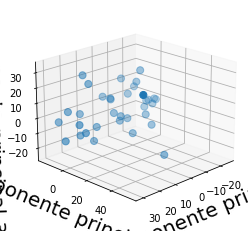

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.zticks(fontsize=14)
#plt.xlabel('Componente principal-1',fontsize=20)
#plt.ylabel('Componente principal-2',fontsize=20)
#plt.zlabel('Componente principal-3',fontsize=20)
#plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
#plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)

ax.set_xlabel('Componente principal-1',fontsize=20)  
ax.set_ylabel('Componente principal-2',fontsize=20)  
ax.set_zlabel('Componente principal-3',fontsize=20)  
ax.view_init(elev=20, azim=45)
ax.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)



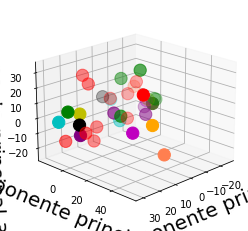

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.zticks(fontsize=14)
#plt.xlabel('Componente principal-1',fontsize=20)
#plt.ylabel('Componente principal-2',fontsize=20)
#plt.zlabel('Componente principal-3',fontsize=20)
#plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
#plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)

ax.set_xlabel('Componente principal-1',fontsize=20)  
ax.set_ylabel('Componente principal-2',fontsize=20)  
ax.set_zlabel('Componente principal-3',fontsize=20)  
ax.view_init(elev=20, azim=45)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = dflog2_Final['tipo'] == target
    ax.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 3'], c = color, s = 150)
#ax.text(targets,prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

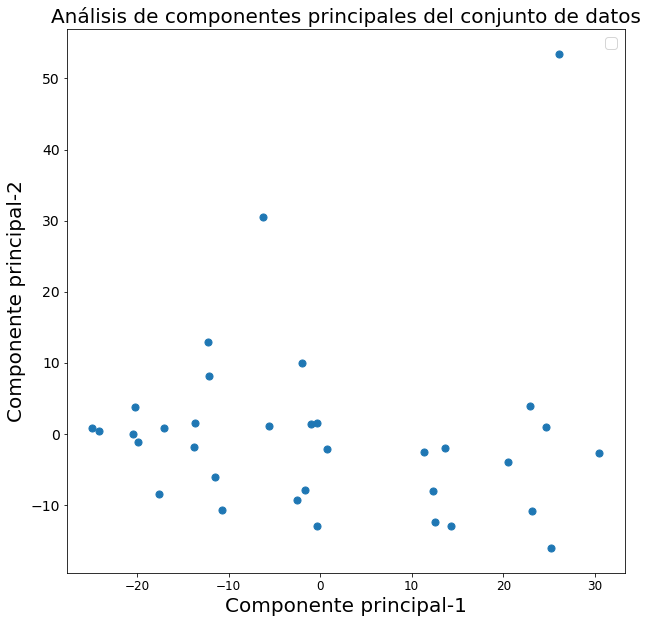

In [77]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'], s = 50)

plt.legend(prop={'size': 15})

In [78]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos
cont_tipos2# ver los nombres para poder plotear y asignar un color a los distintos puntos. 

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

<Figure size 432x288 with 0 Axes>

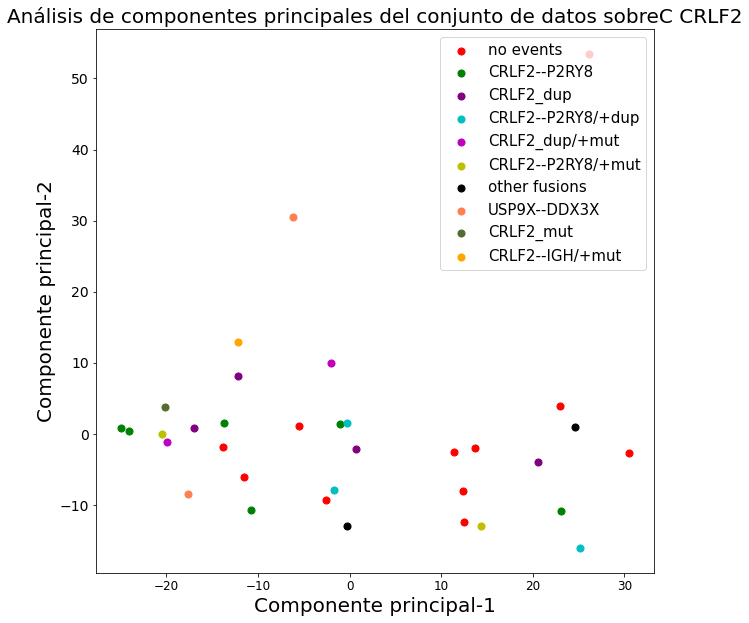

In [100]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobreC CRLF2",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Nota: resolvi el error "Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match)". Al parecer solo era resetear los indices de las filas del dataframe "dflog2_Final" del 0 a n-1 para que coincidieran.

Usando TSNE

In [102]:
x_c= x.copy()
x_c

array([[-1.24249241, -2.28052992,  0.99713937, ...,  1.27153326,
         0.76654712,  0.53431088],
       [-1.1208342 , -1.24739115, -1.18817029, ...,  0.35672302,
        -0.71259702, -0.94036598],
       [ 0.74559821,  0.1955323 ,  1.49185249, ...,  1.20217567,
         0.57820315, -0.19239443],
       ...,
       [-0.37413675, -0.53489805,  0.07923532, ..., -0.49206087,
        -0.82003884, -0.94036598],
       [-0.83045516, -0.45746855, -1.18817029, ...,  0.53686019,
        -2.1009613 , -0.94036598],
       [ 1.28068876,  1.02906768, -0.19417463, ..., -1.15177757,
         1.55932655,  0.41124603]])

In [104]:
#usando  TSNE
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dflog2_Final_tsne= tsne.fit_transform(x_c)

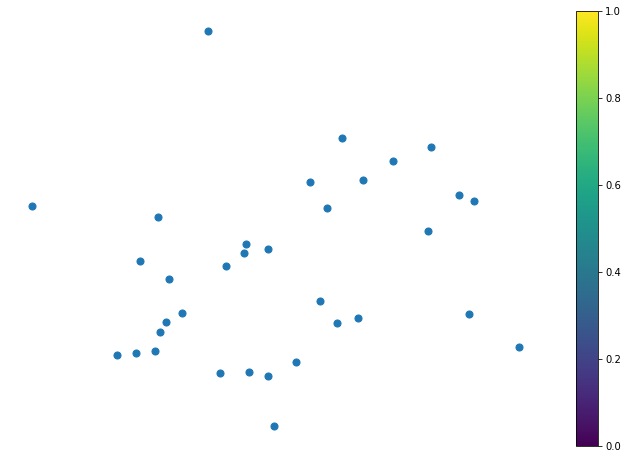

In [111]:
#veamos hasta donde llega tsne
plt.figure(figsize=(12,8))
plt.scatter(dflog2_Final_tsne[:,0], dflog2_Final_tsne[:,1], s = 50)
plt.axis('off')
plt.colorbar()
plt.show()

Trato de cambiar la palabras por numeros para poder graficar en tsne y ver el comportamiento ya que se ve un mejor patron que usando pca. 

In [ ]:
dflog2_Final_T=dflog2_Final.copy()
dflog2_Final_T

In [108]:
# Definir un diccionario de reemplazo
reemplazo = {'no events':0, 'CRLF2--P2RY8':0.1,'CRLF2_dup':0.2,'CRLF2--P2RY8/+dup':0.3,'CRLF2_dup/+mut':0.4,'CRLF2--P2RY8/+mut':0.5,
           'other fusions':1,'USP9X--DDX3X':0.6,'CRLF2_mut':0.7,'CRLF2--IGH/+mut':0.8}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

,Sample,tipo,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,...,Columna_1403,Columna_1404,Columna_1405,Columna_1406,Columna_1407,Columna_1408,Columna_1409,Columna_1410,Columna_1411,Columna_1412
0,CA1396,0.2,0.865372,4.768020,2.856591,4.904675,0.000000,6.593281,6.445244,4.359598,...,0.000000,2.904406,7.058990,6.220354,1.010746,7.955267,4.433829,9.894013,7.557828,0.731555
1,CA1989,0.2,0.938796,5.590270,0.000000,4.775942,0.000000,5.869147,5.941914,3.807553,...,1.298752,2.553663,6.759521,5.394713,0.000000,7.779074,4.147345,9.571874,6.782633,0.000000
2,CA920,0.2,2.065230,6.738658,3.503269,4.134901,0.000000,7.324846,6.132968,5.242604,...,0.000000,3.154474,6.631667,6.845878,0.353924,7.310390,4.931946,9.869589,7.459120,0.371052
3,CA925,0.2,0.778751,6.412202,1.893689,4.730330,0.000000,6.885692,6.307100,5.262084,...,2.039156,3.321306,6.475539,6.603745,2.665699,7.279229,5.534748,9.150287,6.621870,0.312935
4,CA871,0.2,0.731411,5.420694,0.000000,4.295459,0.000000,6.694859,6.035852,4.738450,...,0.000000,2.928106,6.127563,5.767142,0.280313,6.844211,4.621526,9.403932,7.367147,0.490426
5,CA894,0.2,1.818770,7.189696,1.312171,5.620781,0.000000,7.388649,6.334604,6.376501,...,1.167429,4.451927,7.125991,6.296336,2.864803,6.649600,4.985235,8.419521,7.764750,0.719044
6,CA918,0.7,1.492493,5.788084,3.684068,4.665352,0.000000,7.104465,6.618715,5.585067,...,0.117883,3.732449,6.534479,6.598089,0.820348,7.525575,5.576127,9.635301,7.590615,0.767545
7,CA1366,CRLF2--IGH/+mut,1.103066,7.077751,1.524017,5.253043,0.000000,7.090310,5.583681,5.257131,...,1.574215,3.178458,6.434144,6.707124,1.527824,7.125508,5.234061,9.304204,6.763445,0.343744
8,CA1658,0.1,2.113983,7.627496,1.727765,5.499988,0.000000,7.208719,6.477872,5.377383,...,0.122293,3.703243,6.884248,6.788473,0.866823,7.119555,5.260351,9.531873,7.430713,0.875765
9,CA1889,0.1,2.168253,5.826955,4.121618,5.190047,0.000000,7.042478,5.637700,5.419623,...,0.110791,3.734378,7.109242,7.262292,0.000000,7.076147,5.538495,9.675294,8.022339,0.802732


In [112]:
dflog2_Final_T['tipo'].value_counts()

tipo
0.1                11
0                  11
0.2                 6
1                   2
0.6                 2
0.7                 1
CRLF2--IGH/+mut     1
Name: count, dtype: int64

No hizo lo que queria asi que hasta aqui lo dejo, pero de haberlo hecho, se usa para poder asignar el color que va de 0 a 1 y poder graficar. 

Criterio 85% de la info. no sea 0

In [93]:
Caracteristicas = nuevo_dflog2_Final_PCA.columns
Caracteristicas# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_4', 'Columna_6', 'Columna_7',
       'Columna_8', 'Columna_9', 'Columna_11', 'Columna_12', 'Columna_15',
       ...
       'Columna_1400', 'Columna_1401', 'Columna_1402', 'Columna_1404',
       'Columna_1405', 'Columna_1406', 'Columna_1408', 'Columna_1409',
       'Columna_1410', 'Columna_1411'],
      dtype='object', length=1103)

In [96]:
#Normalizando
x85 = nuevo_dflog2_Final.loc[:, Caracteristicas].values
x85 = StandardScaler().fit_transform(x) # Normalizando caract.
x85.shape

(34, 1103)

In [97]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x85),np.std(x85)

(1.2078582316864804e-18, 1.0)

In [98]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(x85.shape[1])]
dflog2_Final_normalizado85 = pd.DataFrame(x85,columns=Caract_cols)
dflog2_Final_normalizado85

,Caracteristica0,Caracteristica1,Caracteristica2,Caracteristica3,Caracteristica4,Caracteristica5,Caracteristica6,Caracteristica7,Caracteristica8,Caracteristica9,...,Caracteristica1093,Caracteristica1094,Caracteristica1095,Caracteristica1096,Caracteristica1097,Caracteristica1098,Caracteristica1099,Caracteristica1100,Caracteristica1101,Caracteristica1102
0,-1.242492,-2.280530,-0.229013,-0.144525,0.372873,-0.869086,0.179605,-0.968847,-1.210308,-0.253014,...,-0.364914,0.526743,0.195774,-0.793657,0.560262,0.159185,1.953116,-0.349679,1.271533,0.766547
1,-1.120834,-1.247391,-0.506923,-1.271216,-0.401851,-1.719217,-0.015602,-1.442864,-2.133530,-0.078725,...,-1.092549,0.207771,-2.041787,-1.508753,0.075433,-1.106142,1.485089,-0.732442,0.356723,-0.712597
2,0.745598,0.195532,-1.890815,0.993726,-0.107781,0.490713,-0.810735,-0.216800,0.389170,0.928046,...,0.470197,0.949407,1.201188,-0.283818,-0.131557,1.117826,0.240114,0.315840,1.202176,0.578203
3,-1.386018,-0.214652,-0.605390,0.310440,0.160242,0.520712,-1.117905,-0.271995,-0.070771,0.330885,...,0.377161,-0.281838,0.169019,0.056320,-0.384322,0.746747,0.157341,1.121227,-0.840504,-1.019347
4,-1.464458,-1.460460,-1.544198,0.013521,-0.257262,-0.285666,-0.991711,-0.783241,-0.209900,-0.195300,...,0.203584,-0.265405,-0.800802,-0.745337,-0.947681,-0.535380,-0.998206,-0.098903,-0.120202,0.402709
5,0.337229,0.762251,1.316932,1.092999,0.202576,2.236877,0.361446,1.689992,0.795832,1.789500,...,1.238527,-1.850758,0.213946,2.361432,0.668733,0.275631,-1.515157,0.387039,-2.915738,1.161374
6,-0.203392,-0.998843,-0.745666,0.650832,0.639880,1.018095,-0.442051,0.837693,2.302065,0.614852,...,0.995641,1.206205,0.637584,0.894558,-0.288901,0.738081,0.811716,1.176512,0.536842,0.829107
7,-0.848649,0.621595,0.523051,0.628809,-0.953245,0.513084,-0.761672,0.067046,0.267224,0.706404,...,-0.636575,-2.026553,0.361811,-0.234919,-0.451340,0.905181,-0.250991,0.719488,-0.403409,-0.749210
8,0.826379,1.312336,1.056161,0.813042,0.423094,0.698268,-0.409088,0.483294,0.305287,0.158235,...,0.994514,0.486221,0.766225,0.835014,0.277362,1.029851,-0.266806,0.754612,0.243127,0.524000
9,0.916302,-0.950002,0.387055,0.554387,-0.870098,0.763317,-0.433323,-0.684442,0.550039,0.921522,...,1.399290,1.308921,1.193210,0.898493,0.641618,1.755998,-0.382111,1.126233,0.650414,1.652878


In [99]:
pca_dflog2_Final85 = PCA(n_components=2)
principalComponents_dflog2_Final85 = pca_dflog2_Final85.fit_transform(x85)

In [100]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DF85 = pd.DataFrame(data = principalComponents_dflog2_Final85
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [101]:
principal_dflog2_Final_DF85

,Componente principal 1,Componente principal 2
0,0.611476,-1.044606
1,21.165910,1.537342
2,-16.042681,0.841125
3,-11.451447,9.149479
4,-0.957020,15.082225
5,-18.840820,-1.189423
6,-19.562529,3.365290
7,-11.612854,15.813578
8,-11.274766,-16.475420
9,-24.624624,-0.612067


In [102]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_Final85.explained_variance_ratio_))

Variación explicada por componente principal: [0.22340362 0.1278675 ]


22.3+12.7=35% de la informacion se mantiene por lo que 65% se pierde. 

<Figure size 432x288 with 0 Axes>

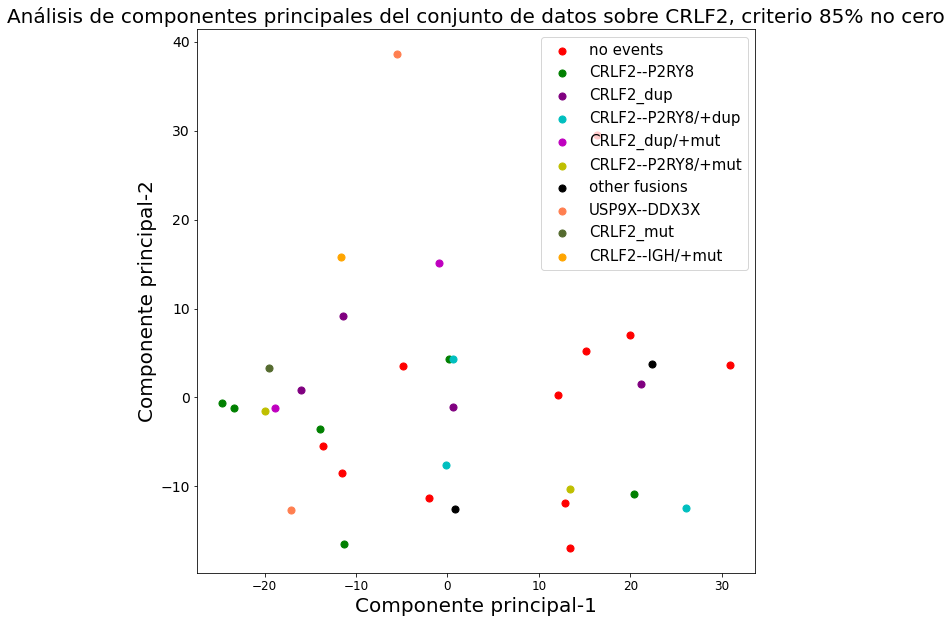

In [103]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, criterio 85% no cero",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})